<a href="https://colab.research.google.com/github/Isabellitankian/pos-fiap/blob/main/Clustering_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 2 - Aprendizado N√£o Supervisionado - Clustering - Verificando tend√™ncias de mercado via Clustering ($K$-Means Clustering em detalhes)

Prof. Dr. Ahirton Lopes

Ref. https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

No mundo atual, onde os dados s√£o considerados o novo petr√≥leo, a capacidade de extrair informa√ß√µes valiosas de conjuntos de dados √© uma vantagem competitiva crucial para as empresas. Uma das maneiras pelas quais as empresas podem obter insights valiosos √© atrav√©s do uso de t√©cnicas de clustering, especialmente quando aplicadas a conjuntos de dados ricos, como o IMDB 5000. O IMDB 5000 √© uma base de dados composta por informa√ß√µes sobre filmes, incluindo detalhes sobre elenco, diretores, avalia√ß√µes dos usu√°rios, or√ßamento de produ√ß√£o e receita de bilheteria. Ao utilizar essa base de dados em conjunto com t√©cnicas de clustering, as empresas podem descobrir padr√µes e tend√™ncias que n√£o seriam √≥bvios √† primeira vista.

Uma aplica√ß√£o inicial do clustering na base de dados IMDB 5000 poderia ser a segmenta√ß√£o de filmes com base em g√™nero, or√ßamento de produ√ß√£o e receita de bilheteria. Isso permitiria √†s empresas identificar quais g√™neros de filmes tendem a ter maior retorno sobre o investimento e quais s√£o mais populares entre diferentes grupos demogr√°ficos. Por exemplo, pode-se descobrir que filmes de a√ß√£o com or√ßamento moderado t√™m um desempenho excepcionalmente bom entre os espectadores jovens, enquanto os filmes de com√©dia rom√¢ntica atraem um p√∫blico mais maduro.

## Lendo os dados

In [1]:
# Baixando nossa base de dados direto do reposit√≥rio da disciplina (https://github.com/ahirtonlopes/Unsupervised_Learning) para o Google Colab

!curl -O https://raw.githubusercontent.com/ahirtonlopes/Unsupervised_Learning/main/IMDB_movie_dataset.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15228  100 15228    0     0  41829      0 --:--:-- --:--:-- --:--:-- 41950


In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv('IMDB_movie_dataset.csv',encoding='utf-8')
dataset.head()

color      director_name  duration        gross  \
0   Color    Martin Scorsese       240  116866727.0   
1   Color        Shane Black       195  408992272.0   
2  color   Quentin Tarantino       187   54116191.0   
3   Color   Kenneth Lonergan       186      46495.0   
4   Color      Peter Jackson       186  258355354.0   

                                 genres                          movie_title  \
0          Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1               Action|Adventure|Sci-Fi                           Iron Man 3   
2  Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                 Drama                             Margaret   
4                     Adventure|Fantasy  The Hobbit: The Desolation of Smaug   

   title_year language country       budget  imdb_score  \
0        2013  English     USA  100000000.0         8.2   
1        2013  English     USA  200000000.0         7.2   
2        2015  English     USA   44000000.0         7.9   
3        2011  English     usa   14000000.0         6.5   
4        2013  English     USA  225000000.0         7.9   

                                              actors  movie_facebook_likes  
0  Leonardo DiCaprio,Matthew McConaughey,Jon Favreau                138000  
1          Robert Downey Jr.,Jon Favreau,Don Cheadle                 95000  
2          Craig Stark,Jennifer Jason Leigh,Zo√´ Bell                114000  
3        Matt Damon,Kieran Culkin,John Gallagher Jr.                     0  
4              Aidan Turner,Adam Brown,James Nesbitt                 83000


Estrat√©gias de limpeza de dados

Como voc√™ pode ver em nosso exemplo, podem haver diferentes tipos de erros em um conjunto de dados:

Outliers: outliers s√£o os n√∫meros em uma coluna que est√£o fora do intervalo. Na verdade, um outlier est√° fora da maioria dos outros valores em um conjunto de dados (c√©lulas vermelhas na figura).

Duplicatas: um conjunto de dados pode conter linhas ou registros repetitivos (linhas roxas na figura).

Valores ausentes: podemos perder dados como resultado de erro humano ou falta de informa√ß√µes (c√©lulas laranja na figura).

Caracteres inv√°lidos ou valores NULL: alguns valores podem conter caracteres inv√°lidos, como valores ‚ÇÆ ou NULL.

√Äs vezes, dados nulos podem ser especificados com valores diferentes, como N/A ou NA ou NAN (c√©lulas claras ou escuras na figura).

Nominal: um atributo pode ser categ√≥rico como uma cor que pode conter um conjunto de valores restritos (por exemplo, azul, vermelho, marrom, ...)

Texto: um atributo pode ser um texto livre ou uma string.
Num√©rico: um atributo pode ser num√©rico (por exemplo, moeda, pontua√ß√µes).

Algumas das estrat√©gias poss√≠veis:

1. Padronizar valores;
2. Normalizar valores;
3. Valida√ß√£o de dados.

In [4]:
# Dropando colunas desnecess√°rias para nosso tipo de an√°lise como cores e linguagem (que podem ser importantes em outros contextos)

dataset.drop(['color','language'], axis= 1, inplace= True)


In [5]:
# Agora, preenchemos os valores vazios de duas colunas num√©ricas: renda bruta (gross) e or√ßamento (budget) com 0's.

dataset['gross'].fillna(0, inplace=True)
dataset['budget'].fillna(0, inplace=True)

In [6]:
# Em seguida, unificamos os valores de outras colunas, como pa√≠s, nome do diretor ou t√≠tulo do filme.

# Colocando em mai√∫sculas todos os valores de pa√≠ses

dataset['country'] = dataset['country'].str.upper()
dataset['country'] = np.where(dataset['country']=='UNITED STATES','USA', dataset['country'])
dataset.head()

director_name  duration        gross  \
0    Martin Scorsese       240  116866727.0   
1        Shane Black       195  408992272.0   
2  Quentin Tarantino       187   54116191.0   
3   Kenneth Lonergan       186      46495.0   
4      Peter Jackson       186  258355354.0   

                                 genres                          movie_title  \
0          Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1               Action|Adventure|Sci-Fi                           Iron Man 3   
2  Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                 Drama                             Margaret   
4                     Adventure|Fantasy  The Hobbit: The Desolation of Smaug   

   title_year country       budget  imdb_score  \
0        2013     USA  100000000.0         8.2   
1        2013     USA  200000000.0         7.2   
2        2015     USA   44000000.0         7.9   
3        2011     USA   14000000.0         6.5   
4        2013     USA  225000000.0         7.9   

                                              actors  movie_facebook_likes  
0  Leonardo DiCaprio,Matthew McConaughey,Jon Favreau                138000  
1          Robert Downey Jr.,Jon Favreau,Don Cheadle                 95000  
2          Craig Stark,Jennifer Jason Leigh,Zo√´ Bell                114000  
3        Matt Damon,Kieran Culkin,John Gallagher Jr.                     0  
4              Aidan Turner,Adam Brown,James Nesbitt                 83000

In [7]:
# Checando por entradas truncadas de dados

dataset['director_name'] = np.where(dataset['director_name']=='N/A','', dataset['director_name'])
dataset['director_name'] = np.where(dataset['director_name']=='NaN','', dataset['director_name'])
dataset['director_name'] = np.where(dataset['director_name']=='Null','', dataset['director_name'])

dataset['movie_title'] = dataset['movie_title'].str.replace('√Ç', '')



Como mencionado, uma das solu√ß√µes para lidar com os outliers √© preencher as linhas correspondentes com os n√∫meros apropriados.

Por exemplo, a dura√ß√£o do filme em nosso conjunto de dados n√£o pode ser inferior a 10 ou superior a 300 minutos.

Para esses casos, preenchemos as c√©lulas com valores zero.

In [8]:
# De modo a normalizar os dados, dividimos os atores em tr√™s atributos diferentes e eliminamos a coluna real da seguinte forma:

actor_list = dataset['actors'].str.split(',',n=2 , expand = True)

dataset["actor1"]= actor_list[0]
dataset["actor2"]= actor_list[1]
dataset["actor3"]= actor_list[2]
dataset.drop(columns=['actors'], inplace=True)
dataset.head()

director_name  duration        gross  \
0    Martin Scorsese       240  116866727.0   
1        Shane Black       195  408992272.0   
2  Quentin Tarantino       187   54116191.0   
3   Kenneth Lonergan       186      46495.0   
4      Peter Jackson       186  258355354.0   

                                 genres                          movie_title  \
0          Biography|Comedy|Crime|Drama              The Wolf of Wall Street   
1               Action|Adventure|Sci-Fi                           Iron Man 3   
2  Crime|Drama|Mystery|Thriller|Western                    The Hateful Eight   
3                                 Drama                             Margaret   
4                     Adventure|Fantasy  The Hobbit: The Desolation of Smaug   

   title_year country       budget  imdb_score  movie_facebook_likes  \
0        2013     USA  100000000.0         8.2                138000   
1        2013     USA  200000000.0         7.2                 95000   
2        2015     USA   44000000.0         7.9                114000   
3        2011     USA   14000000.0         6.5                     0   
4        2013     USA  225000000.0         7.9                 83000   

              actor1                actor2              actor3  
0  Leonardo DiCaprio   Matthew McConaughey         Jon Favreau  
1  Robert Downey Jr.           Jon Favreau         Don Cheadle  
2        Craig Stark  Jennifer Jason Leigh            Zo√´ Bell  
3         Matt Damon         Kieran Culkin  John Gallagher Jr.  
4       Aidan Turner            Adam Brown       James Nesbitt

In [9]:
dataset['duration'] = np.where(dataset['duration']<=10,0, dataset['duration'])
dataset['duration'] = np.where(dataset['duration']>300,0, dataset['duration'])
dataset['imdb_score'] = np.where(dataset['imdb_score']<=0,0, dataset['imdb_score'])
dataset['title_year'] = np.where(dataset['title_year']<2010,0, dataset['title_year'])

In [10]:
# E, finalmente, definimos uma nova m√©trica chamada GOB que mostra o or√ßamento bruto acima do or√ßamento para cada filme:

# Adicione uma nova m√©trica GOB (Bruto acima do or√ßamento, Gross Over Budget)

dataset['GOB'] = dataset.apply(lambda row: row['gross']/row['budget'] if row['budget']!=0 else 0, axis=1)
top_GOB=dataset.sort_values('GOB',ascending=False).head(15)


In [11]:
# Como temos os nomes completos dos diretores, adiciono outra coluna para encurtar seus nomes para melhor visualiz√°-los em um gr√°fico.
# Pegamos a segunda parte do nome, que pode ser o sobrenome deles.

top_GOB['director_familyName'] = dataset["director_name"].str.split(" ", n = 2, expand = True) [1]


In [12]:
# Nova etapa: Visualiza√ß√£o -  a pr√≥xima etapa √© ent√£o visualiz√°-los em um gr√°fico de barras simples, como segue:

import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-13-e1fcd6c93983>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


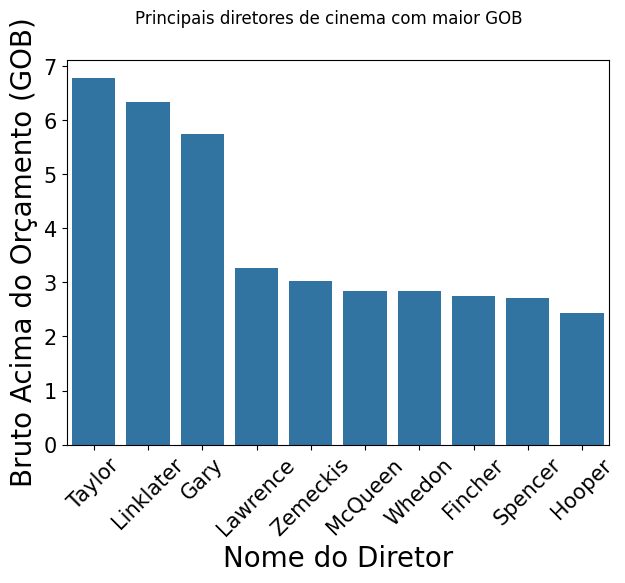

In [13]:
fig,ax = plt.subplots(figsize=(7, 5))

# Desenhando um gr√°fico de barras
ax = sns.barplot(x='director_familyName', y='GOB', data=top_GOB)

# Girando o nome dos diretores em 45 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# T√≠tulo do nosso gr√°fico
fig.suptitle('Principais diretores de cinema com maior GOB', fontsize=12)

# Definindo o nome e o tamanho da fonte do r√≥tulo dos eixos x e y
ax.set_xlabel('Nome do Diretor',fontsize=20)
ax.set_ylabel('Bruto Acima do Or√ßamento (GOB)',fontsize=20)

# Definindo o tamanho do tick do eixo
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Mostra o gr√°fico
plt.show();

<ipython-input-14-32424aeee5e1>:11: FutureWarning: The provided callable <function mean at 0x7cd14eda3d90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  dataset_pivot=top_GOB.pivot_table(index=['title_year'], values=['GOB'], aggfunc=np.mean ,margins=True)


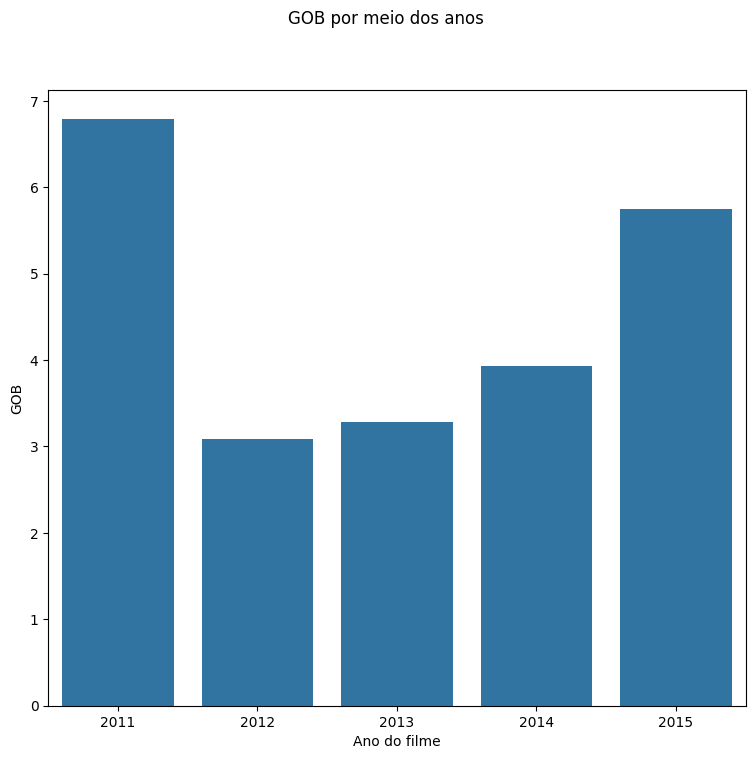

In [14]:
# Vamos fazer uma an√°lise de tend√™ncias baseada em Clustering?

# Qual ano teve o maior GOB?

# O pr√≥ximo relat√≥rio mostra os anos com altas pontua√ß√µes brutas acima do or√ßamento para todos os filmes.
# Para fazer isso, devemos agrupar os registros com base em title_year.
# A tabela din√¢mica em Python √© usada para agrupar colunas e agreg√°-las com base em colunas num√©ricas, conforme mostrado no c√≥digo a seguir.

# Dados de GOB com base no ano do filme

dataset_pivot=top_GOB.pivot_table(index=['title_year'], values=['GOB'], aggfunc=np.mean ,margins=True)

# A coluna do ano no conjunto de dados inclui alguns valores ausentes, iremos ignor√°-los.

# Algumas c√©lulas est√£o vazias na coluna do ano

# dataset_pivot = dataset_pivot.loc[dataset_pivot['title_year'] > 0]

# N√£o precisamos do √∫ltimo registro que inclui a m√©trica de resumo

dataset_pivot = dataset_pivot[:-1]

# Como o √≠ndice mudou ap√≥s a cria√ß√£o de uma tabela din√¢mica, redefinimos o √≠ndice

dataset_pivot.reset_index(inplace=True)

# Algumas c√©lulas est√£o vazias na coluna do ano

# dataset_pivot =dataset_pivot.loc[dataset_pivot['title_year']>0]

fig,ax = plt.subplots(figsize=(9, 8))
ax=sns.barplot(x="title_year", y="GOB", data=dataset_pivot)
fig.suptitle('GOB por meio dos anos', fontsize=12)
plt.xlabel('Ano do filme')
plt.show()

# Podemos agrupar os filmes com base em suas pontua√ß√µes GOB/IMDB?

Diante do que fizemos at√© agora, podemos escolher um algoritmo de clustering para encontrar grupos de dados. A escolha do algoritmo depende de v√°rios fatores, incluindo a natureza dos dados, tamanho dos dados, n√∫mero e tipos de recursos em nosso conjunto de dados, etc.

No exemplo, utilizaremos novamente o algoritmo K-Means, um dos algoritmos de cluster mais populares, que funciona iterativamente para atribuir cada ponto de dados a um dos 'K' grupos com base no
recursos que s√£o fornecidos.

Em nosso conjunto de dados, procuramos uma rela√ß√£o entre uma pontua√ß√£o GOB e IMDB para ver se podemos ou n√£o agrupar filmes com base nessas duas m√©tricas. Primeiro, precisamos especificar o n√∫mero de clusters que procuramos.

No exemplo, iremos escolher tr√™s. Se voc√™ visualizar seus dados em um gr√°fico de dispers√£o, poder√° deduzir o n√∫mero de grupos que poder√° obter do algoritmo, mas se n√£o, n√£o se preocupe. Voc√™ pode alterar o n√∫mero de clusters posteriormente e executar o algoritmo novamente para ver se obt√©m um resultado melhor ou n√£o!

Para tanto, acabei usando um gr√°fico de dispers√£o simples em Python para visualizar essas duas m√©tricas (a pontua√ß√£o GOB e IMDB) em um gr√°fico:

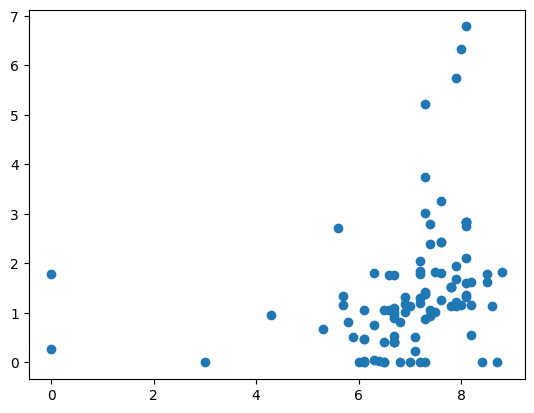

In [15]:
plt.scatter(x=dataset['imdb_score'], y=dataset['GOB'])
plt.show()

In [16]:
# Agora, vamos gerar clustering com tr√™s grupos.

from sklearn.cluster import KMeans

# Excluindo os valores ausentes e selecionando apenas a pontua√ß√£o GOB e IMDB

selected_dataset=dataset.loc[
(dataset['GOB']>0) & dataset['imdb_score']>0][['imdb_score','GOB']]

# Agrupando o conjunto de dados usando o algoritmo K-Means

cls = KMeans(n_clusters=2)

# Ajustar o modelo ao algoritmo

cls.fit(selected_dataset)

# Trazendo os centr√≥ides e o r√≥tulo de cada grupo

centroids=cls.cluster_centers_
labels = cls.labels_

# centroids
# red = selected_dataset[labels == 1]
# red
# green = selected_dataset[labels == 0]
# green

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


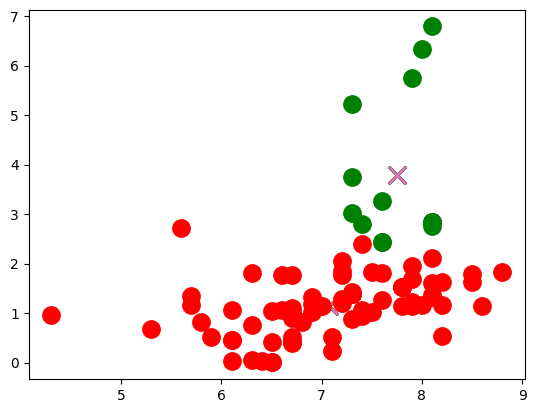

In [17]:
# Como pr√≥ximo passo, vamos colorir os pontos com base em seus grupos e especificar o centro de cada grupo com um marcador (x).

# Temos tr√™s clusters, uma cor para cada cluster

colors = ["g.","r.","b.","y.","p"]

# Criando uma matriz de cada conjunto de dados para percorrer os pontos

dataset_array = np.array(selected_dataset)

# plotando o ponto em um gr√°fico de dispers√£o

for i in range(len(dataset_array)):
    plt.plot(dataset_array[i][0], dataset_array[i][1], colors [labels[i]], markersize =25);
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150);

Vemos ent√£o tr√™s clusters na figura: o primeiro cluster (azul) s√£o os filmes com pontua√ß√£o GOB baixa (n√£o venderam bem) e pontua√ß√£o baixa no IMDB (n√£o foram bem classificados pelos usu√°rios do IMDB).

O segundo grupo inclui os filmes com uma pontua√ß√£o IMDB muito boa, mas n√£o uma pontua√ß√£o GOB muito alta. O terceiro cluster inclui poucos filmes com pontua√ß√µes IMDB entre 7 e 8 e GOB muito alto.

Lembrando que esse √© um subconjunto de filmes, voc√™ pode ter uma interpreta√ß√£o melhor aplicando o algoritmo em todos os filmes.

In [20]:
dataset.columns

Index(['director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'country', 'budget', 'imdb_score', 'movie_facebook_likes',
       'actor1', 'actor2', 'actor3', 'GOB'],
      dtype='object')

# Usando LinearRegression

# 1. Coeficiente de Determina√ß√£o (R¬≤):
O coeficiente de determina√ß√£o, denotado como ùëÖ2, √© uma m√©trica que indica qu√£o bem os dados de entrada explicam a varia√ß√£o na vari√°vel de sa√≠da. Em outras palavras, ele mede a propor√ß√£o da variabilidade total da vari√°vel dependente (target) que √© explicada pelo modelo.

Interpreta√ß√£o:
ùëÖ2 varia de 0 a 1. Um valor de ùëÖ2 pr√≥ximo de 1 indica que o modelo explica bem a variabilidade dos dados, ou seja, a linha de regress√£o ajusta-se bem aos dados observados.
Um ùëÖ2 de 0 significa que o modelo n√£o consegue explicar nenhuma varia√ß√£o nos dados.
Um ùëÖ2 negativo pode ocorrer em modelos mal ajustados e indica que o modelo est√° pior do que uma simples m√©dia dos dados.

# 2. Coeficientes da Regress√£o:
Os coeficientes (ou pesos) s√£o os valores que multiplicam cada uma das vari√°veis independentes no modelo de regress√£o linear. Esses coeficientes determinam a dire√ß√£o (positiva ou negativa) e a magnitude da rela√ß√£o entre as vari√°veis independentes e a vari√°vel dependente.

Interpreta√ß√£o:
Se um coeficiente √© positivo, isso indica que, √† medida que o valor da vari√°vel independente aumenta, o valor da vari√°vel dependente tamb√©m tende a aumentar.
Se um coeficiente √© negativo, isso indica que, √† medida que o valor da vari√°vel independente aumenta, o valor da vari√°vel dependente tende a diminuir.
O valor num√©rico do coeficiente indica o quanto a vari√°vel dependente muda para cada unidade de mudan√ßa na vari√°vel independente.

# 3. Intercepto:
O que √©: O intercepto √© o valor da vari√°vel dependente quando todas as vari√°veis independentes s√£o iguais a zero. √â o ponto onde a linha de regress√£o cruza o eixo y.

Interpreta√ß√£o:
O intercepto fornece uma estimativa da vari√°vel dependente quando as vari√°veis independentes n√£o est√£o presentes ou t√™m um valor nulo.
Ele √© especialmente relevante em modelos onde a rela√ß√£o linear se estende at√© valores pr√≥ximos de zero para as vari√°veis independentes.
Exemplo Pr√°tico:
Considerando um modelo de regress√£o simples com uma vari√°vel independente
ùëã
X e uma vari√°vel dependente
ùë¶
y:
ùë¶
=
intercepto
+
coeficiente
√ó
ùëã
y=intercepto+coeficiente√óX

Se o coeficiente for 2 e o intercepto for 1, o modelo seria:
ùë¶
=
1
+
2
√ó
ùëã
y=1+2√óX
Isso significa que para cada unidade que
ùëã
X aumenta,
ùë¶
y aumenta em 2 unidades, e quando
ùëã
=
0
X=0,
ùë¶
y seria 1.

Com essas m√©tricas, voc√™ pode avaliar a for√ßa, a dire√ß√£o da rela√ß√£o entre as vari√°veis e qu√£o bem o modelo se ajusta aos dados observados.

Coeficiente de determina√ß√£o R¬≤: -0.03667445115368739
Coeficientes: [9.05233684e-06]
Intercepto: 6.4372178470779104


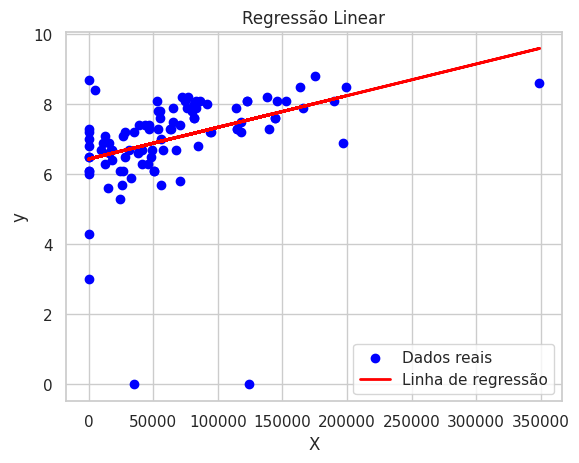

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_regression_results(X, y, model):

    # Faz previs√µes usando o modelo treinado
    y_pred = model.predict(X)

    # Configura o estilo do seaborn
    sns.set(style="whitegrid")

    # Cria um gr√°fico de dispers√£o dos dados reais
    plt.scatter(X, y, color='blue', label='Dados reais')

    # Plota a linha de regress√£o
    plt.plot(X, y_pred, color='red', linewidth=2, label='Linha de regress√£o')

    # T√≠tulos e labels
    plt.title("Regress√£o Linear")
    plt.xlabel("X")
    plt.ylabel("y")

    # Adiciona a legenda
    plt.legend()

# Chama a fun√ß√£o para treinar o modelo e obter as m√©tricas
model, score = linear_regression(X, y)

# Exibe o coeficiente de determina√ß√£o R¬≤
print(f"Coeficiente de determina√ß√£o R¬≤: {score}")
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

# Chama a fun√ß√£o para plotar os resultados
plot_regression_results(X, y, model)


### Usando RandomFlorestRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def random_forest_regression(X, y, n_estimators=100, test_size=0.2, random_state=42):

    # Divide os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Inicializa o modelo Random Forest Regressor
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)

    # Treina o modelo com os dados de treino
    model.fit(X_train, y_train)

    # Faz previs√µes no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcula o erro quadr√°tico m√©dio
    mse = mean_squared_error(y_test, y_pred)

    # Calcula o coeficiente de determina√ß√£o R¬≤
    r2 = r2_score(y_test, y_pred)

    return model, mse, r2


In [45]:
import numpy as np

# Exemplo de dados
X = dataset[['movie_facebook_likes', 'duration', 'title_year']]
y = dataset['imdb_score']

# Chama a fun√ß√£o para treinar o modelo e obter as m√©tricas
model, mse, r2 = random_forest_regression(X, y)

# Exibe o MSE e o coeficiente de determina√ß√£o R¬≤
print(f"Erro Quadr√°tico M√©dio (MSE): {mse}")
print(f"Coeficiente de Determina√ß√£o R¬≤: {r2}")


Erro Quadr√°tico M√©dio (MSE): 3.8987650500000095
Coeficiente de Determina√ß√£o R¬≤: -0.18338039519213556


## Usando XGBoost_Regression

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def xgboost_regression(X, y, test_size=0.2, random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3):

    # Divide os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Inicializa o modelo XGBRegressor
    model = xgb.XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=random_state)

    # Treina o modelo com os dados de treino
    model.fit(X_train, y_train)

    # Faz previs√µes no conjunto de teste
    y_pred = model.predict(X_test)

    # Calcula o erro quadr√°tico m√©dio
    mse = mean_squared_error(y_test, y_pred)

    # Calcula o coeficiente de determina√ß√£o R¬≤
    r2 = r2_score(y_test, y_pred)

    return model, mse, r2


In [47]:
import numpy as np

# Exemplo de dados
X = dataset[['movie_facebook_likes', 'duration', 'title_year']]
y = dataset['imdb_score']

# Chama a fun√ß√£o para treinar o modelo e obter as m√©tricas
model, mse, r2 = xgboost_regression(X, y)

# Exibe o MSE e o coeficiente de determina√ß√£o R¬≤
print(f"Erro Quadr√°tico M√©dio (MSE): {mse}")
print(f"Coeficiente de Determina√ß√£o R¬≤: {r2}")


Erro Quadr√°tico M√©dio (MSE): 4.309754366123761
Coeficiente de Determina√ß√£o R¬≤: -0.3081267425859777


### Em resumo, um baixo ùëÖ2 pode indicar underfitting, mas tamb√©m pode sugerir problemas relacionados √† linearidade, aus√™ncia de vari√°veis importantes, ru√≠do, ou at√© a inadequa√ß√£o dos dados.